# Bengaluru House Price Prediction Model

### Import the necessary Modules/Packages/Libraries

In [1]:
# Pandas is used to make Dataframes,perform data manipulation and analysis on numerical tables and time series.
import pandas as pd

# Numpy  effiecienty perform operations high-level mathematical functions on large, multi-dimensional arrays and matrices. 
import numpy as np

#Matplotlib is a plotting library, to plot various graphs, used for Data Visualization.  
import matplotlib.pyplot as plt


# It is a magic function that renders the figure in a notebook itself.
%matplotlib inline

In [2]:
# To ignore the unnecessary warnings 

import warnings
warnings.filterwarnings('ignore')

### Reding the data in the csv(excel) file 

In [3]:
# Making a Pandas Data Frame of the data

df = pd.read_csv('Bengaluru_House_Data.csv')

# Checking out our data by looking at first five Rows 
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Checking the no of Rows and Columns in our Data
df.shape

(13320, 9)

## Step 1: Data Cleaning

In [5]:
# Grouping our data by area_type feature and checking counts of the values it can assume

df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Checking the Null or Missing values in our Data

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Droping the unnecessary features of Data (Columns) 

In [7]:
df2 = df.drop(['availability','society','area_type','balcony'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Handling the Null Values

In [8]:
# Checking out the Null values in our Data Frame

df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# Since our Data Frame contains 13,320 Rows (Data Points), we can safely Drop the 73 rows (Data Points) missing the 'bath' feature
# The other thing which we could have done was to fill them with the median value

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
#Shape (No of rows and columns) of our New Data Frame after dropping the Null rows

df3.shape

(13246, 5)

### Handling the Non Integral Values 

In [11]:
# Since in our Data Frame we can see that in the 'size' column, the values are non integral, we'll find a way to deal with it

# Let's find the no of unique values in 'size' column

df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# We will create a new columns 'bhk' and try to extract the 'size' column values:

# We use a lamba function for it, we iterate over the 'size' column:
#  1. Split the string into tokens,
#  2. Take the first token, which is the No of rooms,
#  3. Convert it into a integer value and store it in the respective row of our newly created column bhk.

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]) )

In [13]:
# Let's see how our Dataframe looks after the lambda operation
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
# Let's find the unique values in the 'bhk' column
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
# Let's have a look at our newly created 'bhk' column to find the possible errors/outliers

df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
# Something seems off here especially the 43 Bhk house with 2400 sq ft area, we'll deal with these in a while

In [17]:
# Let's check out our 'total_sqft' column for possible errors/outliers/non integral values

df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# We see values like '1133 - 1384' which are a range, so to deal with this kind of data, let's first detect how many of them are float

In [19]:
# We define a funtion is_float(), which:
# 1. Try to convert a value into float,
# 2. If there is an exception, it will return false.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
# We will apply is_float() on 'total_sqft' in each row:
# 1. If the result is true, it is a valid value, we have to make no changes
# 2. If it returns false, it's an invalid value and we will investigate further by returning a DataFrame of such values

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
# Investigating our Data, we have the following problems in our 'total_sqft':
# 1. Data in Ranges eg: '2100 - 2850', '1145 - 1340'.
# 2. Data in different units eg: '34.46Sq. Meter', '4125Perch' 

In [22]:
# Modus Operandi:
# 1. We'd resolve the Range values like '2100 - 2850' by taking their mean.
# 2. We'd Ignore(drop) the other format/unit data.

In [23]:
# For Range Values, let's write a utility function:

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
# Let's create a deep copy of our Dataframe

df4 = df3.copy()

#Let's apply our convert_sqft_to_num() to our 'total_sqft' column

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
# Let's check if our 'total_sqft' has unique float values now

df4[~df4['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk


In [26]:
# Since we see that we don't have any non-float rows, we can say that we have successfully cleaned our Data. 

## Step 2: Feature Engineering & Dimensionality Reduction

In [27]:
df5 = df4.copy()

# Creating a new feature 'price-per-sqft' because that's a deciding factor in real life scenario in Real Estate Market
# Moreover it will help us detect the outliers

df5['price_per_sqft'] = (df5['price']*100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
# Let's check the 'location' column for how many unique locations we have (too many can create a problem)

len(df5.location.unique())

1304

In [29]:
# We generally do a dummy variable or One-Hot Encoding for string data but then, we'll have to add 1304 new columns
# This situation is called Dimensionality Curse (High Dimensionality Problem)
# We thus use various methods to reduce this Dimensionality

In [30]:
# We will stip our location strings of any extra white spaces by using split() menthod in our lambda function

df5.location = df5.location.apply(lambda x: x.strip())

In [31]:
# We then try to find our required stats by:
# 1. Grouping our dataframe by 'location'
# 2. Then aggregate the 'location' by their respective count
# 3. Then sort these aggregated values by their count in descending order

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [32]:
# We see many locations in our data have less very few Data points, so let's define a certain threshhold say 10.
# We then categorise the 'location' of our data based on the threshhold value into an 'others' value.

len(location_stats[location_stats<=10])

1052

In [33]:
# So now we can have these 1052/1293 points to be called as other location

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [34]:
# Let's apply a transformation accordingly categorising every 'location' having < 10 data points as 'other'

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [35]:
# Thus we just have 242 unique values in our 'location' feature, which can be later be converted via One-Hot encoding

## Step 3: Outlier Detection and Outlier removal

In [36]:
# We use a typical generalistic approach on data and take the necessar assumptions:
# 1. One bed room ~ 300 sqft area.

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [37]:
# When we look at our data, we see data points like 'tota_sq' = 600, 'bhk' = 8, these are clear anolmalies/data errors and have to be removed

In [38]:
#Thus we create a new Dataframe with the condition that all the bed rooms with 'total_sqft' per bedroom less than 300 are removed 

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [39]:
# Now let's deal with outliers in 'price_per_sqft'

df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
# We see the properties with 'price_per_sqft' as low as 267 and as high as 176470, we will remove these types of outliers 

In [41]:
# Now to do this we will define a function, that will:
# 1. For every 'location', we will find the mean
# 2. For every locational mean, we'll keep all the points that lie in 1 Standard Deviation to the mean.
# 3. For a Normal Distribution, 68% points lie in 1 Standard Deviation to the mean.

In [42]:
# We here make a Utility Function, which can takes a Dataframe as input and:
# 1. Groups it by feature 'location' and we iterate the sub-dataframes thus created by 'subdf'
# 2. We calculate the mean of 'price_per_sqft' in each 'subdf'
# 3. We calculate the standard deviation of 'price_per_sqft' in each 'subdf'
# 4. We generate a DataFrame 'reduced_df' with all 'price_per_sqft' in range (m-std,m+std)
# 5. We concat the such created Dataframes in a new DataFrame 'df_out' and return it.

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [43]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [44]:
# There might be outlies such as for the similar 'total_sqft' we could have price(2bhk) > price(3bhk), Let's Visualize this:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft, bhk2.price, color='b',label= '2 bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='g',label= '3 bhk', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title('Location')
    plt.legend()

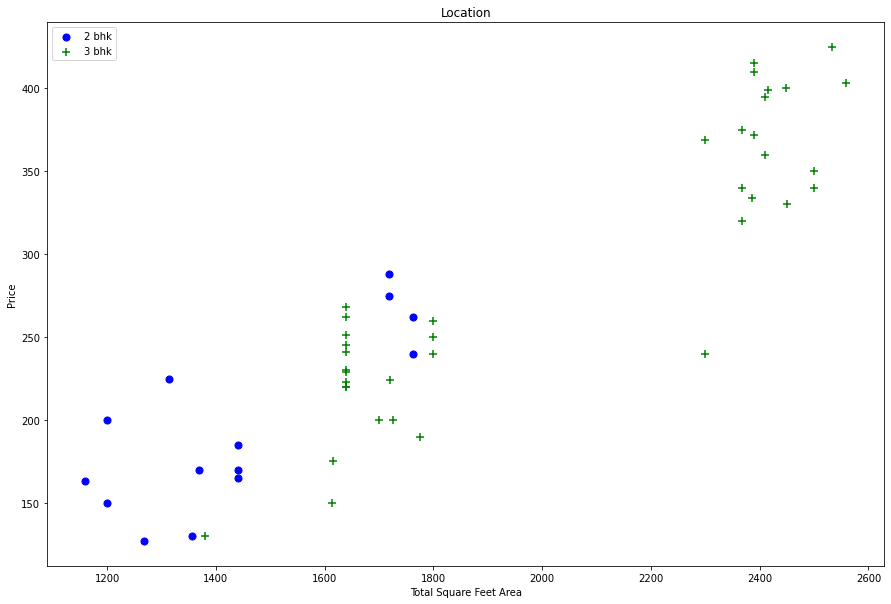

In [45]:
plot_scatter_chart(df7,'Rajaji Nagar')

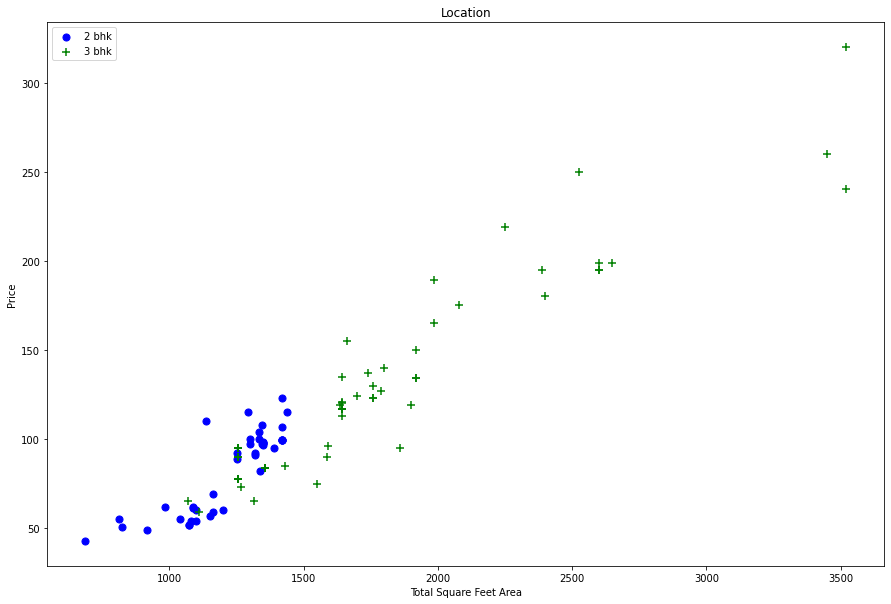

In [46]:
plot_scatter_chart(df7,'Hebbal')

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

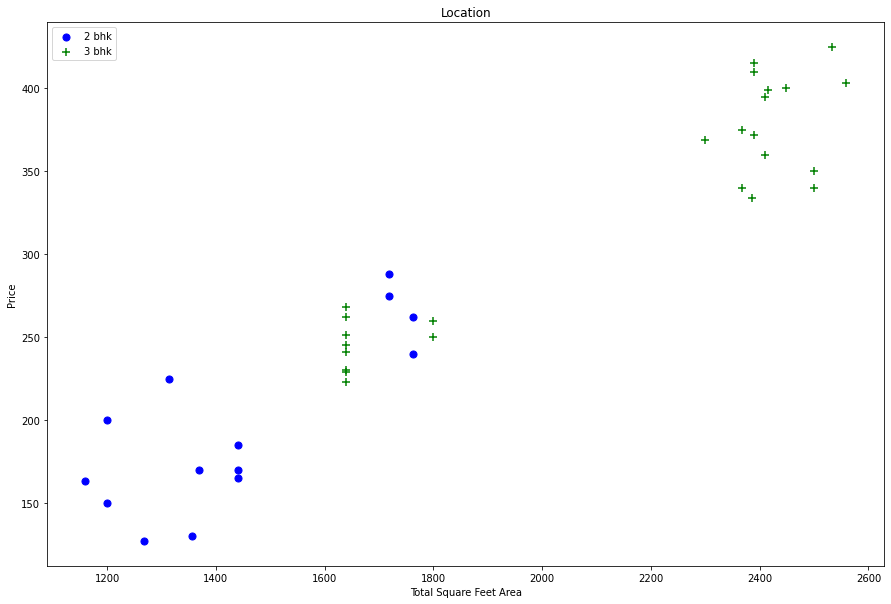

In [48]:
# Now let's plot the same scatterplot to see if the required changes have been made and let's visualise it.
plot_scatter_chart(df8,'Rajaji Nagar')

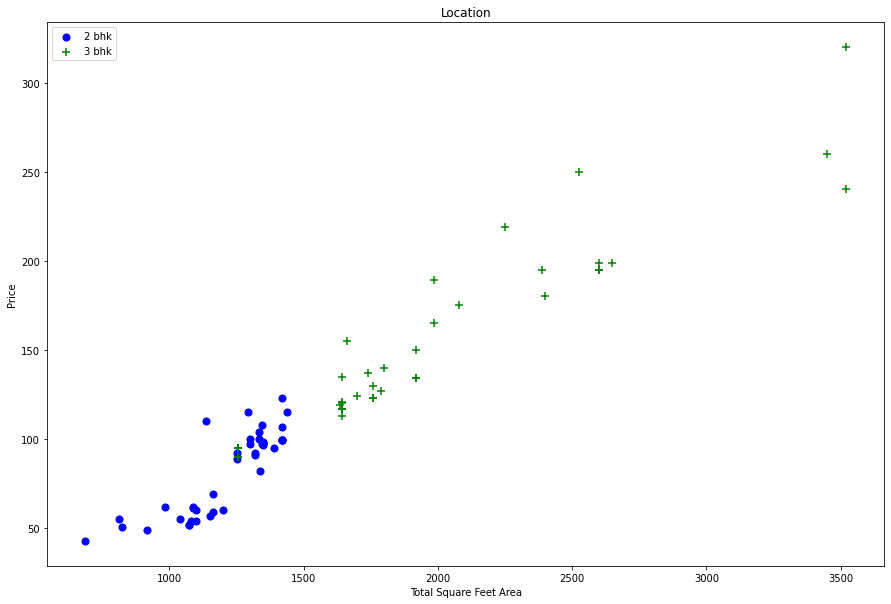

In [49]:
plot_scatter_chart(df8,'Hebbal')

In [50]:
# We can thus see the data points for 3bhk which had lower price than 2bhk for the same sqft have been removed.

Text(0, 0.5, 'Count')

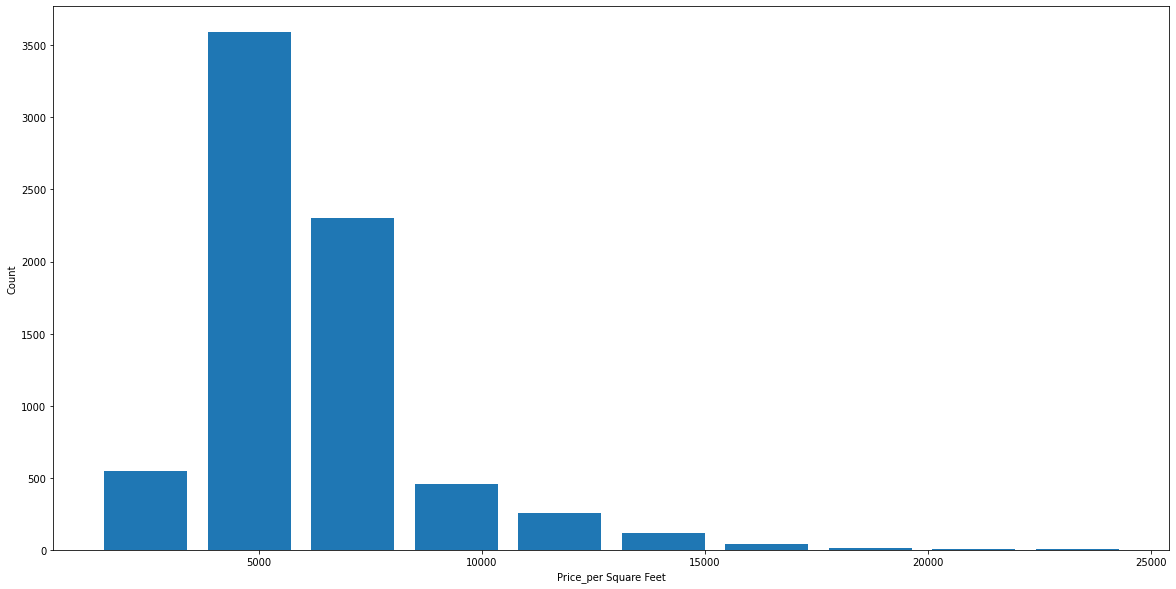

In [51]:
# Let's plot a Histogram to see how many properties we have in per sqft area

plt.figure(figsize=(20,10))
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price_per Square Feet')
plt.ylabel('Count')

In [52]:
# As we notice the Histogram we realise that our dataset has a Normal Distribution (Skewed-Left)

In [53]:
# Now let's explore the bath feature

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
# Now we see that we have houses with more than 10 bathroom too, let's checkout these houses

df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

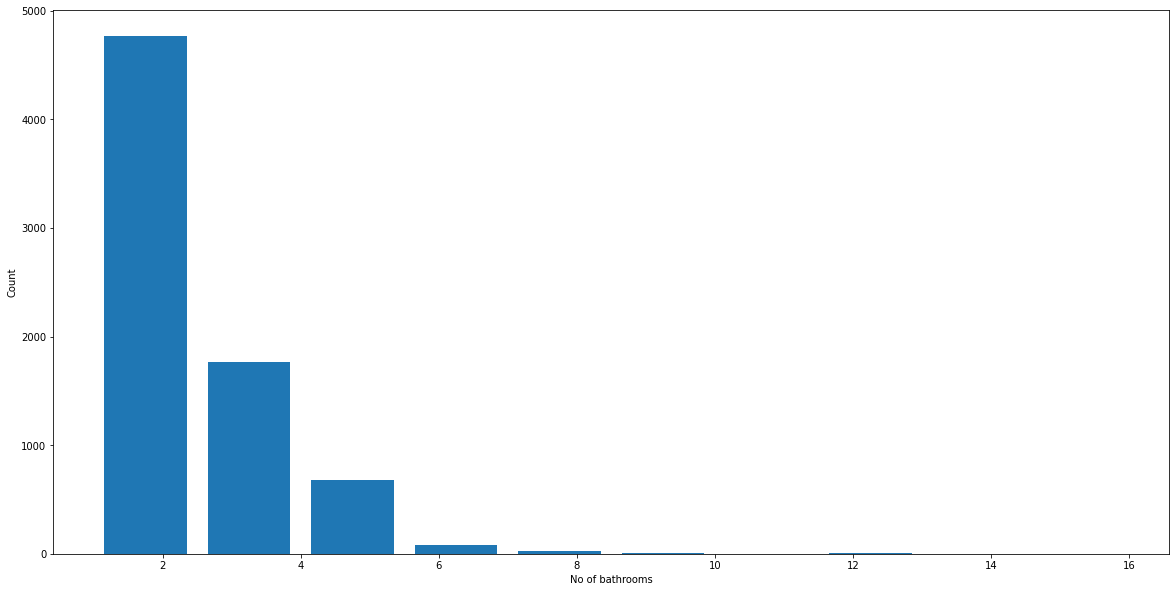

In [55]:
# let's plot a Histogram to gain further insights into this

plt.figure(figsize=(20,10))
plt.hist(df8.bath, rwidth= 0.8)
plt.xlabel('No of bathrooms')
plt.ylabel('Count')

In [56]:
# Taking our observations into account, we notice that anytime we have no of bathrooms > bedrooms+2 it's unusual

df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [57]:
# So now remove these outliers to get our new data frame

df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7251, 7)

In [58]:
# So our data now is pretty clean and we can start preparing it for Machine Learning Training
# But before that let's remove some unnecessary colums:
# 1. 'size' because we already extracted 'bhk' from it
# 2. 'price_per_sqft' because it was derived fom 'price' and 'total_sqft' and was just used for outlier detection.

df10 = df9.drop(['size','price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [59]:
# Thus we sum up our Data Cleaning and outlier detetion Step with this, our Data is now ready to be Trained using ML Algos.

## Step 4: Model Building

In [60]:
# Approach:
# 1. Build our Machine Lerning Model
# 2. Use K Fold Cross validation
# 3 Use GridSearchCV to come up with the best algorithm and best parameters

In [61]:
# Since our 'location' column contains non-numeric data, we will convert it via One-Hot Encoding

dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Since we have created our dummy variable One-Hot encoding, we will now concatenate it with our dataframe.
# We'll drop one of the columns (last) to prevent a dummay variable trap.  

df11 = pd.concat([df10, dummies.drop('other',axis='columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Now let'ds drop our location Column as we have already converted it into dummies

df12 = df11.drop('location', axis = 'columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Let's examine the shape of our dataframe befre we begin building a model

df12.shape

(7251, 245)

In [65]:
# X = Independent Variable (Our input, the one we use to predict the output)
# Y = Dependent Variable (Our output, the one that needs to be predicted)

X = df12.drop('price', axis = 'columns')
Y = df12.price

In [66]:
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
Y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [68]:
# We will now divide our data into training and testing using sklearn library's functionality

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size = 0.2, random_state = 10)

In [69]:
# Now we will create a LinearRegresson model

from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()

In [70]:
# Now let's train our model by passing the x_train and y_train into it

lr_clf.fit(x_train, y_train)

LinearRegression()

In [71]:
# Since our model is now built, let's test it and find our accuracy score

lr_clf.score(x_test, y_test)

0.8452277697873348

In [72]:
# Our accuracy is around 85% which is pretty decent, now we'll try K Fold Cross Validation,
# It would help us Validate our model over different tarining and testing sets from our data.

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# ShuffleSplit is used to split our data into n_split parts and Randomise the Sample
cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state=0)

# cross_val_score will be used to calculate the accuracy on these differently split training and testing sets
cross_val_score(LinearRegression(), X, Y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [73]:
# We will now try different Algorithms and Parameters to Hypertune our Model using GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [74]:
# Let's define a function for using GridSearchCV

def find_best_model_using_GridSearchCV(x,y):
    # Let's make a simple dict algos 
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    # Now let's use our function along with GridSearchCV to find the optimal Algo/Para combination.
    scores=[]
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score= False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [75]:
# Now let's call this method on our dataset

find_best_model_using_GridSearchCV(X,Y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687436,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718156,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Thus We realise that our Linear Regression with 'normalize' as False is the most accurate algorithm

In [76]:
def predict_price(location,sqft,bath,bhk):
    # For location, we are loacting the approprite column
    loc_index= np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index > 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [77]:
# Now let's try making price prediction with our model

print(predict_price('1st Phase JP Nagar',1000,2,2),"Lakh")

83.4990467659196 Lakh


In [78]:
print(predict_price('1st Phase JP Nagar',1000,3,3),"Lakh")

86.80519394619049 Lakh


In [79]:
print(predict_price('Indira Nagar',1000,2,2),"Lakh")

181.27815484012922 Lakh


### Export The Model:

In [80]:
# We will export this model to a pickle file so that it can be use by our Python Flask Server

In [81]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [82]:
# Other than our Model, we need the Column information too, so we will make a json file for that

In [83]:
import json

# We will convert all column names into lower case and then store them
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))